In [1]:
import os
import sys

notebook_dir = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(os.path.join(notebook_dir, "."))

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from report_config import ReportConfig
from utils import categorize_role, ROLE_GROUPS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stevi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
reviews_df = pd.read_csv("../glassdoor_reviews_predicted.csv")

In [4]:
sentiment_mapping = {0: 3, 1: 1, 2: 2}
reviews_df["sentiment_plot"] = reviews_df["sentiment"].map(sentiment_mapping)

In [5]:
reviews_df["sentiment_plot"] = np.select(
    condlist=[
        (reviews_df["sentiment"] == 0),
        (reviews_df["sentiment"] == 1),
        (reviews_df["sentiment"] == 2),
    ],
    choicelist=[3, 1, 2],
)

In [6]:
employees_role = set(list(reviews_df["employee_role"].unique()))

In [7]:
employees_role_list = list(employees_role)

In [8]:
len(employees_role_list)

537

In [9]:
for role in employees_role_list:
    print(role)

Consultor De Gestão De Projetos
Vendedor Externo
QAssurance
Analista de atendimento
Assistente De Planejamento
Assistente De Laboratório
Encarregado
Consultor SAP Júnior
Técnico Em Segurança Do Trabalho
Gerente De Recursos Humanos (RH)
Assistente Administrativo I
Analista De Sistemas Júnior
Suporte Técnico
Operador Industrial
Assistente De Recursos Humanos (RH)
Atendente De SAC
Atendente
Analista De Educação Coorporativa
SDR
Diretor Comercial
Executivo De Contas
Digitador
Analista De Suporte Atendimento
Analista Socioambiental
Consultor Sênior
Assistente De Administrativo I
Programador Pleno
Advogado Pleno
Coordenador Técnico De Lavoura
Engenheiro Agrícola
Vendedor
Técnico Agrícola
CONTADOR
Jovem Aprendiz Auxiliar Administrativo
Assistente Técnico Comercial (ATC)
Analista De Suporte Pleno
Operador De Produção
Analista De Suporte Em Geoprocessamento
Consultor Juridico
Analista De Requisitos Sênior
Agente Comercial
Analista De Controladoria Júnior
Analista De Teste Junior
Assistente Admi

In [10]:
it_roles = [
    "Consultor De Implantação Júnior",
    "QAssurance",
    "dev junior 2",
    "Analista De Requisitos Sênior",
    "Analista de Implantação",
    "Analista De Sistemas N2",
    "Analista Desenvolvedor De Sistemas",
    "Desenvolvedor Front End Angular Junior",
    "Analista De Suporte",
    "Analista De Sistemas Desenvolvedor",
    "Software Developer",
    "Senior Analyst Developer",
    "Desenvolvedor de Java Senior - PJ",
    "Desenvolvedor Sênior",
    "Analista De Teste",
    "Analista De TI Pleno",
    "Analista De Suporte Técnico",
    "Programador De Sistemas Pleno",
    "Desenvolvedor Genexus",
    "Consultor De Implementação",
    "Técnico Em Suporte Técnico N2",
    "Analista De Suporte E Infraestrutura Em TI",
    "Administrador De Redes",
    "Consultor SAP",
    "Consultor SAP Júnior",
    "Técnico Em Sistemas Da Informação",
    "Programador C#",
    "Programador Delphi",
    "Programador Trainee",
    "Analista De Sistemas Sênior",
    "IT Consultant",
    "QA Analyst",
    "Analyst",
    "Business ",
    "QA Analyst",
    "Analista De Teste Junior",
    "Analista De Infraestrutura",
    "Analista De Negócios De TI Pleno",
    "Técnico De Suporte Júnior",
    "Técnico Em Sistemas Da Informação",
    "Analista De Suporte Técnico",
    "Programador De Sistemas Pleno",
    "Analista Desenvolvedor Pleno",
    "ANALISTA SAP",
    "Gerente De Projetos De TI",
    "Desenvolvedor Genexus",
    "Analista De Requisitos Pleno",
    "IT Consultant",
    "Analista De Sistemas",
    "Analista De Suporte",
    "Supervisor De Infraestrutura De TI",
    "Desenvolvedor Sênior",
    "Analista De Implantação",
    "Desenvolvedor De Software",
    "Gerente De Serviços De TI",
    "Analista De Requisitos",
    "Coordenador De Service Desk",
    "Arquiteto Desenvolvedor Java Sênior",
    "Analista De Sistemas Sênior I",
    "Analista Desenvolvedor De Sistemas",
    "Consultor De Implantação De Sistemas",
    "Software Developer",
    "Desenvolvedor Front End Angular Junior",
    "Analista De Redes Júnior",
    "Analista De TI Pleno",
    "Analista De Requisitos Sênior",
    "Product Owner",
    "Analista De Suporte E Infraestrutura Em TI",
    "QA Analyst",
    "Técnico Em Suporte Técnico",
    "Analista De Suporte Pleno",
    "Consultor SAP B1",
    "dev junior 2",
    "Coordenador De Desenvolvimento De Software",
    "Consultor De Implantação",
    "Analista De Suporte De Sistemas",
    "Technical Support Engineer",
    "Técnico Em Informática",
    "Assistente De Implantação",
    "Desenvolvedor Júnior I",
    "Desenvovedor De Software Pleno",
    "Information Technology Analyst",
    "Analista De Negócios Pleno",
    "Especialista De Sistemas",
    "Técnico De Suporte",
    "Analista De Infraestrutura Pleno",
    "Senior Analyst Developer",
    "QA Analyst",
    "Analista De Testes",
    "Analista De Implantação Sênior",
    "Desenvolvedor C++ Pleno",
    "Analista De Sistemas Sênior I",
    "Consultor De Implantação Pleno",
    "Analista De Infraestrutura e Suporte",
    "Consultor SAP Júnior",
    "Analista De Sistemas Sênior",
    "Auxiliar De Analista De Sistemas",
    "Programador Trainee",
    "Consultor TI",
    "Analista De Negócios Júnior",
    "Analista De Implantação Pleno",
    "Desenvolvedor C#",
    "UX Designer",
    "System Analyst",
    "Técnico Suporte N2",
    "Desenvovedor Pleno",
    "Gerente De TI",
    "Programador Pleno",
    "Analista De Suporte I",
    "Quality Assurance",
    "QA Analyst",
    "Técnico Em Suporte Técnico",
    "Analista De Teste Junior",
    "Analista De Suporte E Infraestrutura Em TI",
    "Desenvolvedor.NET",
    "Analista De Infraestrutura e Suporte",
    "Consultor SAP Júnior",
    "Analista De Sistemas Desenvolvedor",
    "Suporte Técnico",
    "Analista De Desenvolvimento Júnior",
    "Programador",
    "Analista De Redes",
    "Gerente De TI",
    "Técnico Em Suporte Técnico",
    "QA Analyst",
    "Analista De Suporte De Sistemas",
    "Technical Support Engineer",
    "Analista De Implantação Pleno",
    "Desenvolvedor C#",
    "System Analyst",
    "Analista De Testes",
]

In [11]:
it_roles_set = set(it_roles)

In [12]:
print(it_roles_set)

{'Coordenador De Service Desk', 'Consultor De Implantação Júnior', 'Desenvolvedor de Java Senior - PJ', 'Administrador De Redes', 'QAssurance', 'Analista De Teste', 'Programador Delphi', 'Analista De Suporte E Infraestrutura Em TI', 'Consultor SAP Júnior', 'Business ', 'Desenvolvedor C#', 'Consultor SAP B1', 'Suporte Técnico', 'Gerente De Projetos De TI', 'Analista De Testes', 'Analista Desenvolvedor De Sistemas', 'Analista De Infraestrutura Pleno', 'Auxiliar De Analista De Sistemas', 'Analista De Sistemas Sênior I', 'Programador Pleno', 'Analista De Desenvolvimento Júnior', 'Analista De Suporte I', 'Analista De Suporte Pleno', 'Analista De Sistemas N2', 'Técnico Em Informática', 'Analista De Requisitos Sênior', 'Analista De Implantação', 'Desenvolvedor De Software', 'Analista De Teste Junior', 'Analista De Infraestrutura', 'Programador De Sistemas Pleno', 'Supervisor De Infraestrutura De TI', 'Desenvovedor De Software Pleno', 'Desenvolvedor Júnior I', 'Gerente De Serviços De TI', 'Ana

In [13]:
IT_ROLES_LIST = sorted(
    [
        "Analista de Sistemas Sênior",
        "Técnico De Suporte II",
        "Analista De Negócios",
        "Desenvolvedor.NET",
        "Consultor De Suporte Técnico",
        "Programador I Júnior",
        "Consultor De Implementação Pleno",
        "Gerente De Projetos De TI",
        "UX Designer",
        "Analista De Teste",
        "Desenvolvedor React Native",
        "Analista De Sistemas Júnior",
        "Analista De Negócios Sênior",
        "Analista De Negócios Pleno",
        "Business Analyst",
        "Consultor De Implantação De Sistemas",
        "Gerente De Serviços De TI",
        "Analista De Requisitos Sênior",
        "Analista De Suporte Pleno",
        "Técnico Suporte N2",
        "Analista De TI Sênior",
        "Analista De Teste Junior",
        "Técnico De Informática",
        "Suporte técnico",
        "Analista Desenvolvedor De Sistemas",
        "Desenvolvedor De Software",
        "Analista De Negócios De TI Pleno",
        "Coordenador De Desenvolvimento De Software",
        "Técnico Em Sistemas Da Informação",
        "Analista De Sistemas Sênior",
        "Consultor SAP Júnior",
        "Analista de Negócios",
        "Programador Sênior",
        "Information Technology Analyst",
        "Cientista De Dados",
        "Analista De Suporte I",
        "Quality Assurance",
        "Analista De Desenvolvimento Pleno",
        "Desenvolvedor De Programas",
        "Analista De Sistemas Pleno",
        "Web Designer",
        "Analista De Suporte",
        "Suporte Técnico",
        "Analista Desenvolvedor .NET",
        "Arquiteto Desenvolvedor Java Sênior",
        "Técnico De Informática II",
        "Analista De BI",
        "Consultor TI",
        "Técnico suporte informática",
        "Desenvolvedor C++ Pleno",
        "Analista de Sistemas Júnior",
        "Técnico De Suporte",
        "Administrador De Redes",
        "Analista De Testes Pleno",
        "Sofware Developer",
        "System Analyst",
        "Analista De Suporte Júnior",
        "Analista De Qualidade Pleno",
        "Analista Desenvolvedor Pleno",
        "Técnico Em Suporte Técnico",
        "Consultor SAP B1",
        "QA Analyst",
        "Product Owner",
        "Programador Pleno",
        "Analista De Sistemas Desenvolvedor",
        "Analista De Infraestrutura Pleno",
        "Programador Júnior",
        "Especialista Em Sistemas",
        "Analista De TI II",
        "Analista De Sistemas N2",
        "Analista De Requisitos Pleno",
        "Desenvolvedor",
        "Analista De Projetos II",
        "Coordenador De Service Desk",
        "Estagiário De Desenvolvimento",
        "Desenvolvedor Front End Angular Junior",
        "Desenvolvedor De Sistemas",
        "Analista De Sistemas",
        "Analista De Negócios Júnior",
        "Software Developer",
        "Analista De Suporte Técnico",
        "Analista de Infraestrutura e Suporte",
        "Analista Service Desk",
        "Programador treinee",
        "Analista de Negócios Pleno",
        "Técnico Em Informática",
        "Analista De Redes",
        "Programador Trainee",
        "dev junior 2",
        "Analista De Implantação Pleno",
        "Programador Pleno V",
        "Analista De Projetos Pleno",
        "Estagiário De TI",
        "Analista De Sistemas Sênior I",
        "Consultor SAP",
        "Desenvolvedor De Software Pleno",
        "Programador De Sistemas Pleno",
        "Estágio Desenvolvimento Java",
        "Desenvolvedor de Java Senior - PJ",
        "Auxiliar De Analista De Sistemas",
        "Analista De Implantação Sênior",
        "Supervisor De Infraestrutura De TI",
        "Analista De TI Pleno",
        "Analista De Tecnologia Da Informação (TI)",
        "Technical Support Engineer",
        "Desenvolvedor Pleno",
        "Analista De Conversão De Dados",
        "Técnico De Suporte Júnior",
        "ANALISTA SAP",
        "Senior Analyst Developer",
        "Analista De Suporte E Infraestrutura Em TI",
        "Analista De Requisitos",
        "Técnico Em Suporte Técnico Pleno",
        "Analista De Testes Sênior",
        "Especialista De Sistemas",
        "Analista De Suporte De Sistemas",
        "Analista de Suporte Técnico",
        "Desenvolvedor Júnior",
        "Técnico Em Suporte Técnico N2",
        "Analista De Testes",
        "QAssurance",
        "Desenvolvedor C#",
        "Analista Programador",
        "IT Consultant",
        "Desenvolvedor Júnior I",
        "Analista Desenvolvedor Sênior",
        "Programador Delphi",
        "Desenvolvedor Genexus",
        "Gerente De TI",
        "Analista Desenvolvedor",
        "Analista De Redes Júnior",
        "Analista De Desenvolvimento Júnior",
        "Programador",
        "Desenvolvedor Sênior",
        "Consultor De Implantação Júnior",
        "Analista Desenvolvedor .NET Sênior",
    ]
)

In [14]:
# IT_ROLES_LIST

In [15]:
reviews_df.loc[(reviews_df["employee_role"].isin(IT_ROLES_LIST))]

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label,sentiment_plot
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,2023-03-11,4.0,1,0,1,Positivo,1
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,2023-03-11,4.0,2,0,2,Negativo,2
14,26628766,Tecnomapas,Analista De Desenvolvimento Pleno,Funcionário(a) atual,"Ambiente de trabalho, intervalos, plano de saú...",2015-03-04,3.0,1,0,1,Positivo,1
15,26628766,Tecnomapas,Analista De Desenvolvimento Pleno,Funcionário(a) atual,"´Vantagens que não são muito interessantes, of...",2015-03-04,3.0,2,1,2,Negativo,2
16,26632444,Tecnomapas,Desenvolvedor C#,Ex-funcionário(a),Empresa flexível em relação a horários devido ...,2015-03-18,1.0,1,0,1,Positivo,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2525,31777863,Totem Treinamento e Consultoria em TI,Arquiteto Desenvolvedor Java Sênior,"Funcionário(a) atual, mais de 3 anos",Valorizar funcionários novos que demonstram bo...,2020-02-10,4.0,2,0,2,Negativo,2
2528,42894163,Totem Treinamento e Consultoria em TI,Analista De Sistemas,Funcionário(a) atual,Bom ambiente de trabalho.\r\n\r\nEquipe bastan...,2021-02-22,5.0,1,0,1,Positivo,1
2529,42894163,Totem Treinamento e Consultoria em TI,Analista De Sistemas,Funcionário(a) atual,Não tenho nenhum ponto negativo sobre a empresa.,2021-02-22,5.0,0,1,0,Neutro,3
2530,45976432,Totem Treinamento e Consultoria em TI,Analista De Sistemas,"Funcionário(a) atual, mais de 3 anos","Oportunidade para iniciantes, muitos projetos.",2021-04-23,2.0,1,0,1,Positivo,1


In [16]:
# def categorize_role(role):
#     if role in IT_ROLES_LIST:
#         return 0
#     elif role == "Funcionário confidencial":
#         return 1
#     else:
#         return 2

In [17]:
reviews_df["role_group"] = reviews_df["employee_role"].apply(categorize_role)

In [18]:
reviews_df

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label,sentiment_plot,role_group
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",2023-12-15,5.0,1,0,1,Positivo,1,0
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,2023-12-15,5.0,0,1,0,Neutro,3,0
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,2023-03-11,4.0,1,0,1,Positivo,1,1
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,2023-03-11,4.0,2,0,2,Negativo,2,1
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,2022-02-24,1.0,0,1,0,Neutro,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2527,35726303,Totem Treinamento e Consultoria em TI,Funcionário confidencial,"Funcionário(a) atual, menos de um ano",Local de trabalho é muito pequeno.,2020-09-08,5.0,2,0,2,Negativo,2,2
2528,42894163,Totem Treinamento e Consultoria em TI,Analista De Sistemas,Funcionário(a) atual,Bom ambiente de trabalho.\r\n\r\nEquipe bastan...,2021-02-22,5.0,1,0,1,Positivo,1,1
2529,42894163,Totem Treinamento e Consultoria em TI,Analista De Sistemas,Funcionário(a) atual,Não tenho nenhum ponto negativo sobre a empresa.,2021-02-22,5.0,0,1,0,Neutro,3,1
2530,45976432,Totem Treinamento e Consultoria em TI,Analista De Sistemas,"Funcionário(a) atual, mais de 3 anos","Oportunidade para iniciantes, muitos projetos.",2021-04-23,2.0,1,0,1,Positivo,1,1


In [19]:
reviews_df[reviews_df["employee_role"] == "Analista Desenvolvedor"]

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label,sentiment_plot,role_group
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,2023-03-11,4.0,1,0,1,Positivo,1,1
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,2023-03-11,4.0,2,0,2,Negativo,2,1


## Other Roles

In [20]:
reviews_df[reviews_df["role_group"] == 0]["sentiment_plot"].value_counts()

sentiment_plot
1    819
2    632
3    163
Name: count, dtype: int64

## IT Roles

In [21]:
reviews_df[reviews_df["role_group"] == 1]["sentiment_plot"].value_counts()

sentiment_plot
1    311
2    276
3     57
Name: count, dtype: int64

## Confidential Roles

In [22]:
reviews_df[reviews_df["role_group"] == 2]["sentiment_plot"].value_counts()

sentiment_plot
1    139
2    113
3     22
Name: count, dtype: int64

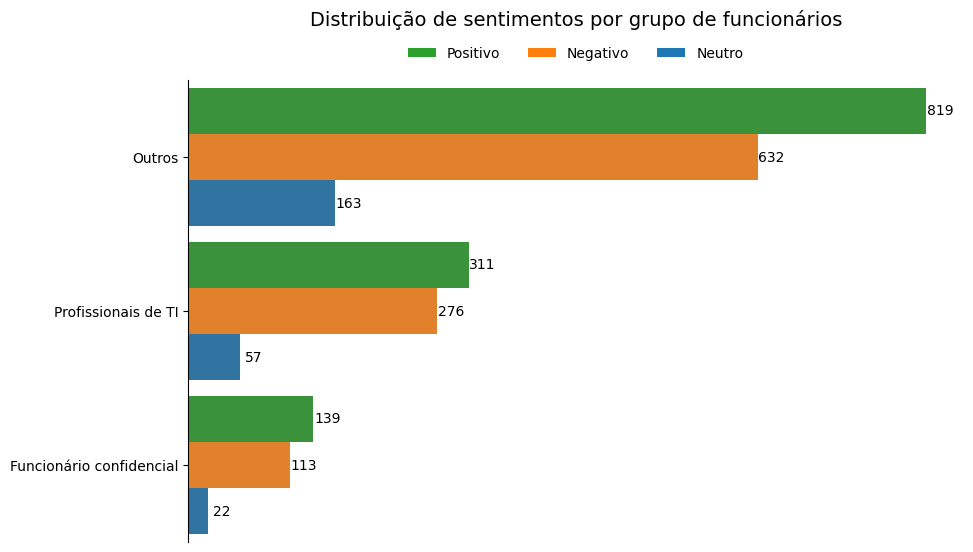

In [23]:
sentiment_counts = (
    reviews_df.groupby(["role_group", "sentiment_plot"])
    .size()
    .reset_index(name="sentiment_count")
)

fig, ax = plt.subplots(1, figsize=(10, 6))

sns.barplot(
    data=sentiment_counts,
    x="sentiment_count",
    y="role_group",
    hue="sentiment_plot",
    palette=[
        ReportConfig.POSITIVE_SENTIMENT_COLOR,
        ReportConfig.NEGATIVE_SENTIMENT_COLOR,
        ReportConfig.NEUTRAL_SENTIMENT_COLOR,
    ],
    ax=ax,
    width=0.9,
    orient="h",
)

for p in ax.patches:
    ax.annotate(
        text=f"{p.get_width():.0f}",
        xy=(p.get_width(), (p.get_y() + p.get_height() / 2)),
        ha="center",
        va="center",
        fontsize=10,
        color="black",
        xytext=(10, 0),
        textcoords="offset points",
    )

ax.set_title(
    "Distribuição de sentimentos por grupo de funcionários",
    fontsize=ReportConfig.CHART_TITLE_FONT_SIZE,
    y=1.1,
)

ax.set_xlabel("")
ax.set_xticks([])

ax.set_ylabel("")
ax.set_yticklabels(
    [ROLE_GROUPS[group] for group in sentiment_counts["role_group"].unique()]
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

positive_patch = plt.Rectangle((0, 0), 1, 1, fc=ReportConfig.POSITIVE_SENTIMENT_COLOR)
negative_patch = plt.Rectangle((0, 0), 1, 1, fc=ReportConfig.NEGATIVE_SENTIMENT_COLOR)
neutral_patch = plt.Rectangle((0, 0), 1, 1, fc=ReportConfig.NEUTRAL_SENTIMENT_COLOR)

ax.legend(
    # title="Sentimento",
    handles=[positive_patch, negative_patch, neutral_patch],
    labels=ReportConfig.PLOT_SENTIMENT_LABELS,
    bbox_to_anchor=(0.5, 1.1),
    loc="upper center",
    edgecolor="1",
    ncols=3,
)

plt.savefig(
    "real_sentiment_by_role_group.png",
    transparent=False,
    dpi=300,
    bbox_inches="tight",
)

plt.show()